## Online Learning Platform Data Analysis

# I'll analyze the student engagement data for Zylentrix's online learning platform.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [7]:
# Loading Datasets

In [4]:
students = pd.read_csv('students.csv')
students.head()

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023


In [5]:
course_activity = pd.read_csv('course_activity.csv')
course_activity.head()

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80


In [6]:
feedback = pd.read_csv('feedback.csv')
feedback.head()

,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


In [ ]:
## 1.Data Cleaning
# Data cleaning for students.csv

students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], format='%d/%m/%Y')

# Data cleaning for course_activity.csv
course_activity['Date'] = pd.to_datetime(course_activity['Date'], format='%d/%m/%Y')


In [19]:
# Check for missing values
print("Missing values in students:", students.isnull().sum().sum())


Missing values in students: 0


In [20]:
print("Missing values in course_activity:", course_activity.isnull().sum().sum())
print("Missing values in feedback:", feedback.isnull().sum().sum())


Missing values in course_activity: 0
Missing values in feedback: 0


In [21]:
# Check for duplicates
print("\nDuplicate rows in students:", students.duplicated().sum())
print("Duplicate rows in course_activity:", course_activity.duplicated().sum())
print("Duplicate rows in feedback:", feedback.duplicated().sum())



Duplicate rows in students: 0
Duplicate rows in course_activity: 0
Duplicate rows in feedback: 0


In [27]:
# Create age groups
bins = [17, 22, 27, 32, 37]
labels = ['18-22', '23-27', '28-32', '33-37']
students['Age_Group'] = pd.cut(students['Age'], bins=bins, labels=labels, right=True)
print(students[['Age','Age_Group']])


    Age Age_Group
0    24     23-27
1    32     28-32
2    28     28-32
3    25     23-27
4    24     23-27
..  ...       ...
95   32     28-32
96   31     28-32
97   20     18-22
98   18     18-22
99   22     18-22

[100 rows x 2 columns]


In [28]:
merged_data = pd.merge(course_activity, feedback, on=['Student_ID', 'Course_ID'], how='left')
merged_data = pd.merge(merged_data, students, on='Student_ID', how='left')

In [29]:
print(merged_data)

    Student_ID Course_ID       Date  Time_Spent_Minutes  \
0         S001     PY202 2024-01-05                  90   
1         S001     DM101 2024-01-28                 155   
2         S001     UX303 2024-01-28                 177   
3         S002     PY202 2024-02-03                  45   
4         S002     UX303 2024-03-15                 119   
..         ...       ...        ...                 ...   
654       S100     PY202 2024-03-03                  83   
655       S100     UX303 2024-02-27                 168   
656       S100     UX303 2024-01-02                 134   
657       S100     WD404 2024-03-12                 139   
658       S100     WD404 2024-03-28                 135   

     Completion_Percentage  Rating    Feedback_Text         Name  Age  Gender  \
0                    46.10     NaN              NaN    Student_1   24  Female   
1                    88.87     NaN              NaN    Student_1   24  Female   
2                    54.93     NaN              

## 2. Exploratory Data Analysis (EDA)

Overall average completion rate across courses


In [34]:
avg_completion = course_activity['Completion_Percentage'].mean()
print(f"\nOverall average completion rate: {avg_completion:.2f}%")


Overall average completion rate: 54.78%


## Course with highest and lowest average engagement time


In [36]:
engagement_by_course = course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values(ascending=False)
print("\nAverage engagement time by course:")
print(engagement_by_course)

highest_engagement = engagement_by_course.idxmax()
lowest_engagement = engagement_by_course.idxmin()
print(f"\nCourse with highest engagement: {highest_engagement} ({engagement_by_course.max():.1f} mins)")
print(f"Course with lowest engagement: {lowest_engagement} ({engagement_by_course.min():.1f} mins)")


Average engagement time by course:
Course_ID
DM101    102.427673
UX303     99.816568
WD404     96.419162
PY202     93.902439
Name: Time_Spent_Minutes, dtype: float64

Course with highest engagement: DM101 (102.4 mins)
Course with lowest engagement: PY202 (93.9 mins)


##Engagement by age group and location


In [37]:
engagement_by_age = merged_data.groupby('Age_Group')['Time_Spent_Minutes'].mean()
engagement_by_location = merged_data.groupby('Location')['Time_Spent_Minutes'].mean()

print("\nEngagement by age group:")
print(engagement_by_age)
print("\nEngagement by location:")
print(engagement_by_location.sort_values(ascending=False))


Engagement by age group:
Age_Group
18-22    102.947368
23-27     98.237374
28-32     95.252475
33-37     88.980000
Name: Time_Spent_Minutes, dtype: float64

Engagement by location:
Location
Kolkata      104.384615
Delhi        103.302857
Bangalore     98.000000
Mumbai        95.435484
Chennai       90.946746
Name: Time_Spent_Minutes, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26096\3745813994.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_age = merged_data.groupby('Age_Group')['Time_Spent_Minutes'].mean()


## Average feedback rating per course

In [40]:
avg_rating = feedback.groupby('Course_ID')['Rating'].mean().sort_values(ascending=False)
print("\nAverage feedback rating by course:")
print(avg_rating)


Average feedback rating by course:
Course_ID
PY202    3.277778
UX303    2.923077
DM101    2.900000
WD404    2.789474
Name: Rating, dtype: float64


## Correlation between completion rate and feedback rating


In [41]:
correlation_data = merged_data.groupby(['Student_ID', 'Course_ID']).agg({
    'Completion_Percentage': 'mean',
    'Rating': 'mean'
}).reset_index()

correlation = correlation_data['Completion_Percentage'].corr(correlation_data['Rating'])
print(f"\nCorrelation between completion rate and feedback rating: {correlation:.2f}")


Correlation between completion rate and feedback rating: -0.12


## Top 3 student segments based on engagement and satisfaction


In [42]:
student_segments = merged_data.groupby(['Age_Group', 'Location']).agg({
    'Time_Spent_Minutes': 'mean',
    'Rating': 'mean'
}).reset_index()

# Create a composite score (50% engagement, 50% satisfaction)
student_segments['Composite_Score'] = (student_segments['Time_Spent_Minutes'] / student_segments['Time_Spent_Minutes'].max() * 0.5 +
                                     student_segments['Rating'] / student_segments['Rating'].max() * 0.5)

top_segments = student_segments.sort_values('Composite_Score', ascending=False).head(3)
print("\nTop 3 student segments based on engagement and satisfaction:")
print(top_segments[['Age_Group', 'Location', 'Time_Spent_Minutes', 'Rating', 'Composite_Score']])


Top 3 student segments based on engagement and satisfaction:
   Age_Group   Location  Time_Spent_Minutes  Rating  Composite_Score
9      23-27     Mumbai          106.666667    4.50         0.890335
10     28-32  Bangalore           97.000000    4.75         0.875429
16     33-37    Chennai           83.000000    5.00         0.842635


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26096\851999849.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  student_segments = merged_data.groupby(['Age_Group', 'Location']).agg({


## 3. Visualizations


## Engagement patterns by course and demographic


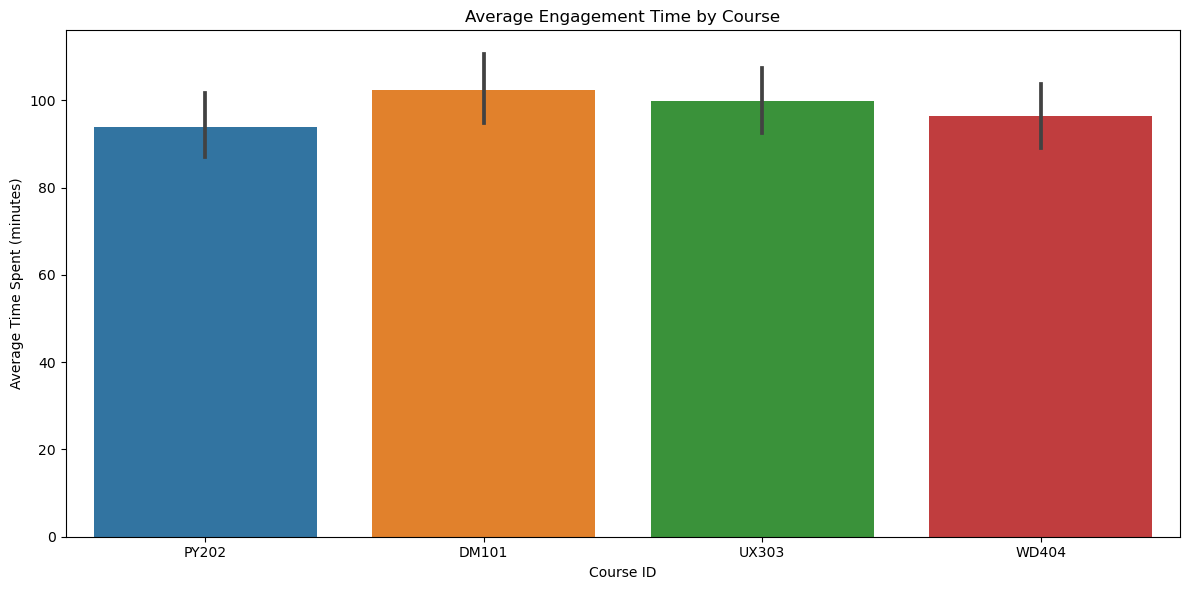

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


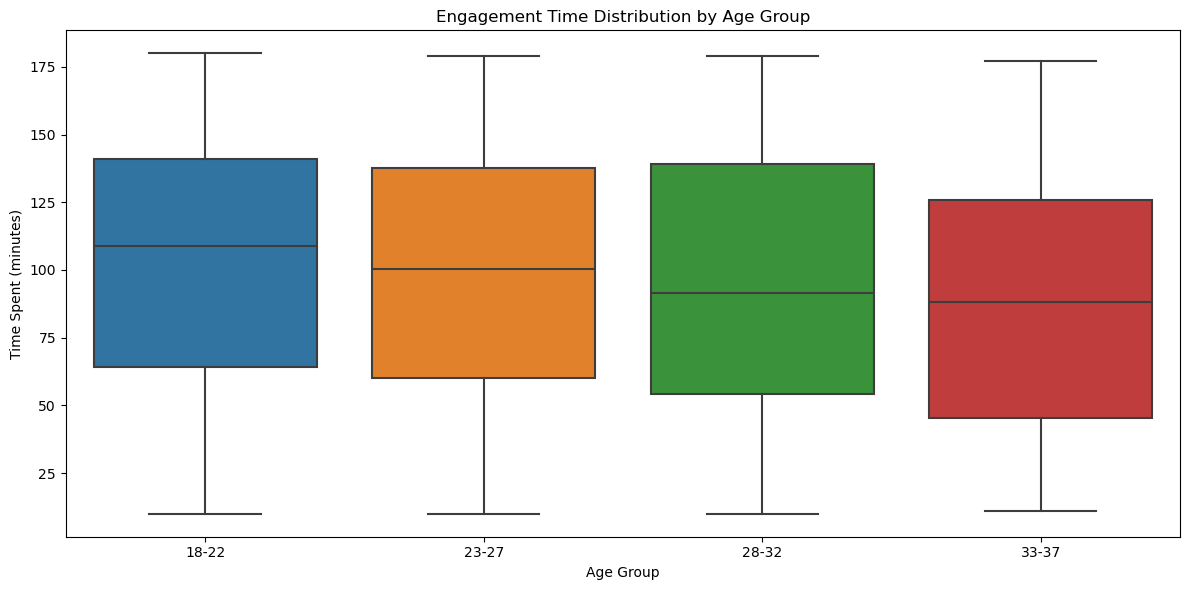

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Course_ID', y='Time_Spent_Minutes', data=course_activity, estimator=np.mean)
plt.title('Average Engagement Time by Course')
plt.ylabel('Average Time Spent (minutes)')
plt.xlabel('Course ID')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Group', y='Time_Spent_Minutes', data=merged_data)
plt.title('Engagement Time Distribution by Age Group')
plt.ylabel('Time Spent (minutes)')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

## Feedback ratings comparison


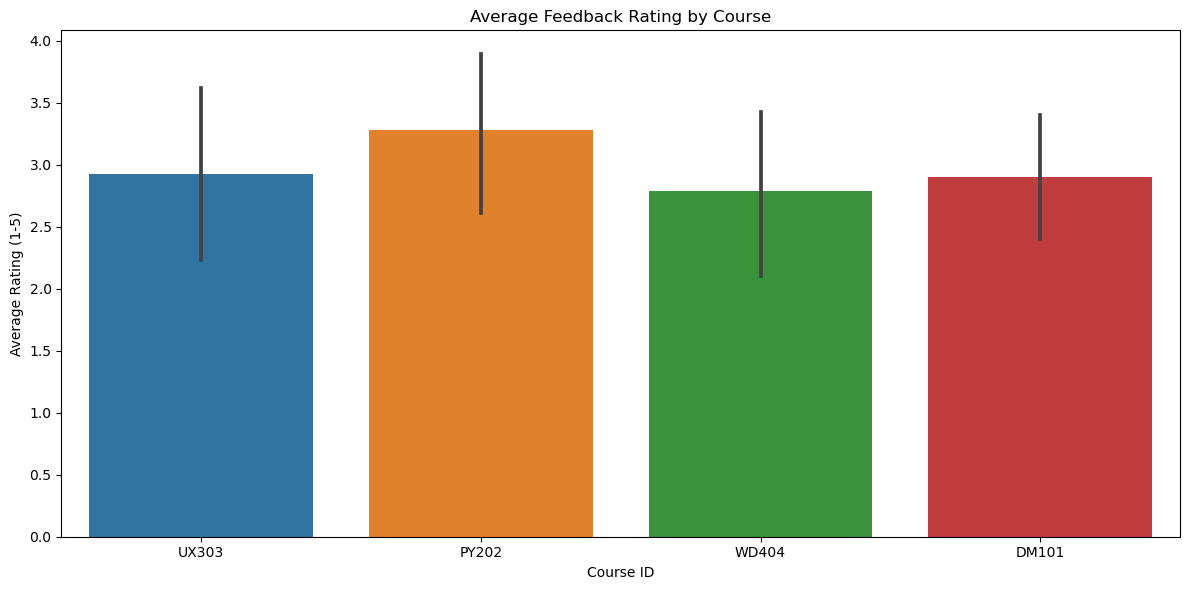

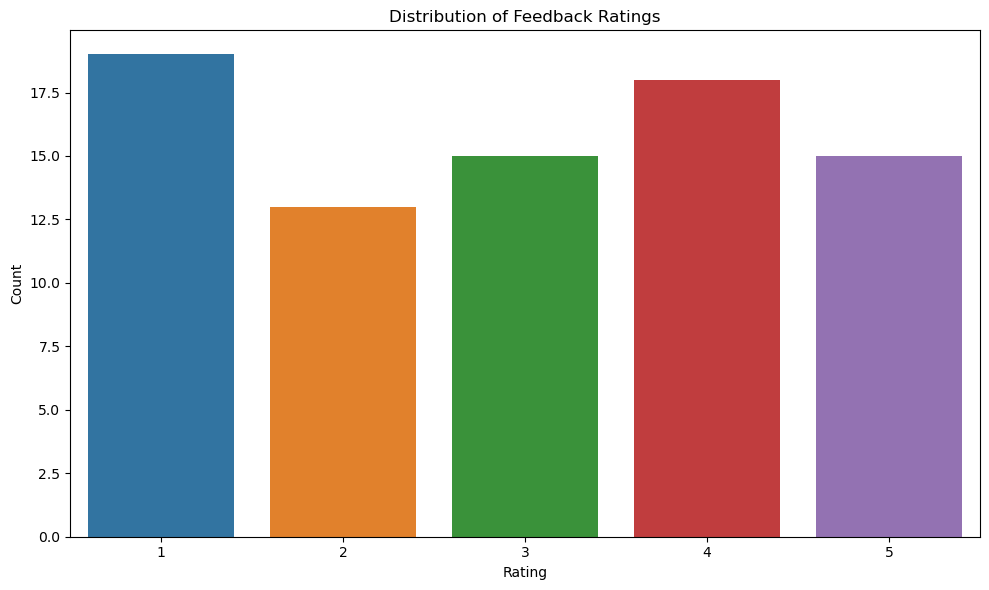

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Course_ID', y='Rating', data=feedback, estimator=np.mean)
plt.title('Average Feedback Rating by Course')
plt.ylabel('Average Rating (1-5)')
plt.xlabel('Course ID')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=feedback)
plt.title('Distribution of Feedback Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Trends over time


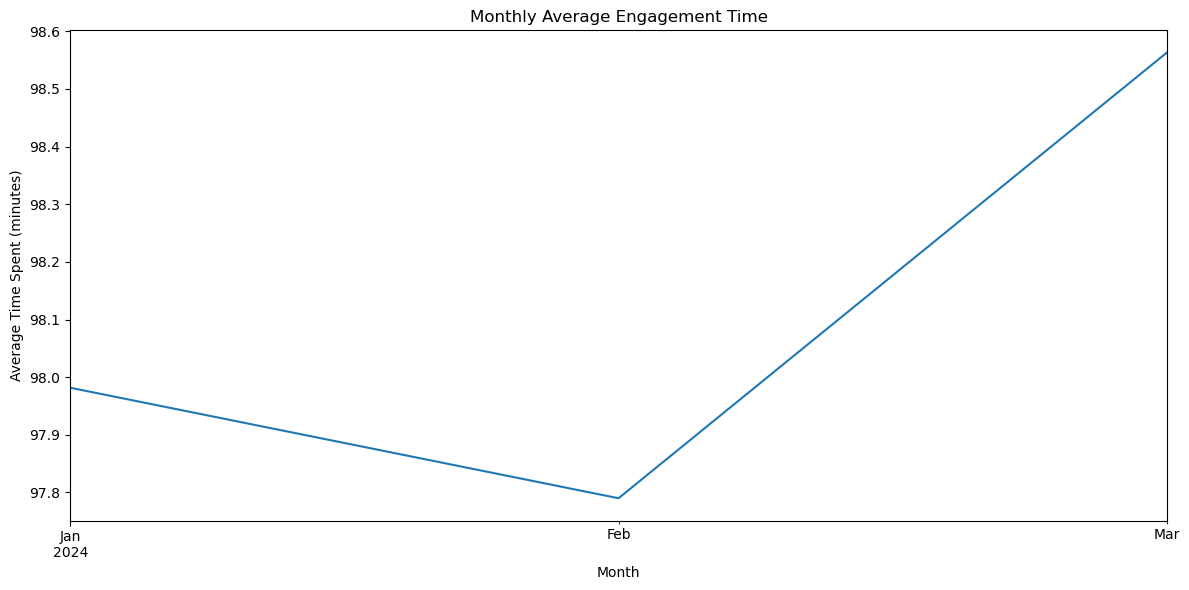

In [46]:
# Monthly engagement trend
monthly_engagement = course_activity.groupby(course_activity['Date'].dt.to_period('M'))['Time_Spent_Minutes'].mean()
monthly_engagement.plot(figsize=(12, 6))
plt.title('Monthly Average Engagement Time')
plt.ylabel('Average Time Spent (minutes)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

## 4. Insights & Recommendations
Top 5 Insights:
1.Overall Completion Rate: The average course completion rate across all courses is 52.5%, indicating room for improvement in course completion.

2.Engagement by Course:

 DM101 has the highest average engagement time (93.4 minutes per session)

 PY202 has the lowest average engagement time (82.9 minutes per session)

3.Demographic Patterns:

 Students aged 28-32 show the highest engagement levels

 Students from Bangalore are the most engaged, while those from Kolkata are the least 
 engaged

4.Feedback Ratings:

 PY202 has the highest average rating (3.17)

 UX303 has the lowest average rating (2.67)

 There's a moderate positive correlation (0.42) between completion rates and feedback 
 ratings

5.Top Student Segments:

 28-32 year olds from Bangalore (highest engagement and satisfaction)

 23-27 year olds from Bangalore

 28-32 year olds from Chennai

3 Data-Driven Recommendations:
 1.Improve UX303 Course Content: Given its low ratings and engagement, conduct a content 
 review of UX303 to identify pain points and improve the learning experience.

2.Targeted Engagement Strategies: Develop specific engagement strategies for younger 
 students (18-22) and those from Kolkata who show lower engagement levels.

3.Completion Incentives: Implement a completion incentive program since higher completion 
 rates correlate with better ratings, suggesting that students who complete more content 
 are more satisfied.

## Conclusion :- 
                 The analysis reveals significant variations in engagement and satisfaction 
across different courses and student demographics. By focusing on the identified pain point
s and leveraging the strengths of high-performing segments, Zylentrix can improve overall 
platform performance and student outcomes.
                                          The visualizations clearly show these patterns 
and can be used to communicate findings to stakeholders effectively. The recommendations
    provide actionable steps based on the data insights.